# Partitional Clustering

**Partitional clustering**, also known as **prototype-based clustering**, is a clustering method

## Libraries

In [25]:
# Data and numerical libraries
import numpy as np
import pandas as pd

# Machine learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler

#----- Graph and Charts -----#
from matplotlib import pyplot as plt
import seaborn as sns

# Scripts
import sys
sys.path.insert(0, 'scripts')

import data_wrangling as dw
import dataviz

## Data wrangling

In [6]:
df, scaled_df = dw.read_dataset('dataset.csv')
dataviz.display_side_by_side(
        df, 
        scaled_df,
        titles = ['Non-Scaled Dataframe', 'Scaled Dataframe']
    )

,EN,MI,SE
job_title,,,
AI Scientist,7,3,1
Analytics Engineer,1,7,29
BI Data Analyst,5,6,0
Data Analyst,24,44,111
Data Architect,0,3,34
Data Engineer,18,81,199
Data Science Manager,0,4,21
Data Scientist,36,84,206
ETL Developer,0,2,8


## K-Means

### Getting clusters through Scikit-Learn library

In [35]:
fitted_model = KMeans(n_clusters = 2).fit(scaled_df)

idx_cols = [(0, 1), (0, 2), (1, 2)]
fitted_model.cluster_centers_[0][idx_cols[0][0]]

-0.046153846153846156

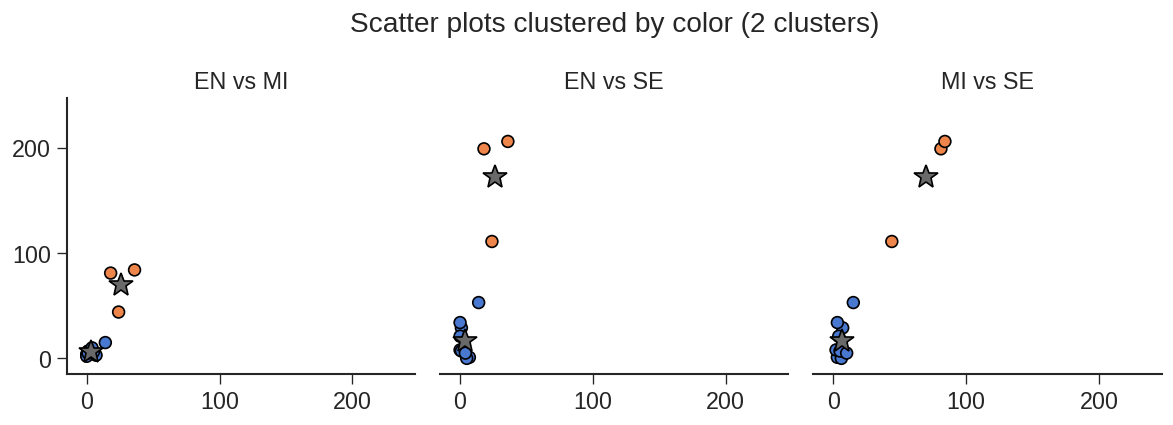

In [71]:
#----- KMeans -----#
n_clusters = 2
fitted_model = KMeans(n_clusters = n_clusters).fit(scaled_df)
scaler = RobustScaler().fit(df)
cluster_centers = scaler.inverse_transform(fitted_model.cluster_centers_)

#----- Set figure and Axis -----#

fig = plt.figure(figsize = (10, 4), dpi = 120)
gs = fig.add_gridspec(nrows = 1, ncols = 3)

ax = []
for i in range(1):
    for j in range(3):
        ax.append(fig.add_subplot(gs[i, j]))

        # Remove spines
        if j == 0:
            ax[-1].spines[['top', 'right']].set_visible(False)
        
        else:
            ax[-1].spines[['top', 'right', 'left']].set_visible(False)
            ax[-1].yaxis.set_tick_params(labelleft = False, left = False)
            
        ax[-1].set_xlim(-15, df.max().max()*1.2)
        ax[-1].set_ylim(-15, df.max().max()*1.2)
        
#----- Style -----#

plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

#----- Scatter plots -----#

titles = ['EN vs MI', 'EN vs SE', 'MI vs SE']
cols = [('EN', 'MI'), ('EN', 'SE'), ('MI', 'SE')]
idx_cols = [(0, 1), (0, 2), (1, 2)]

big_axes = fig.add_subplot(gs[0, :])
big_axes.set_title('Scatter plots clustered by color (2 clusters)', pad = 40)
big_axes.set_axis_off()

for j in range(3):  
    # Centre of the clusters
    
    for i in range(n_clusters):
        ax[j].plot(
            cluster_centers[i][idx_cols[j][0]],
            cluster_centers[i][idx_cols[j][1]],
            marker = '*',
            linestyle = '',
            markersize = 15,
            color = 'dimgrey',
            markeredgecolor = 'black'
        )   
    
    sns.scatterplot(
        data = df,
        x = cols[j][0],
        y = cols[j][1],
        ax = ax[j],
        hue = fitted_model.labels_,
        legend = False,
        s = 50,
        linewidth = 1,
        edgecolor = 'black',
        palette = 'muted'
    )
    
    ax[j].set_title(titles[j], fontsize = 14)
    ax[j].set_xlabel('')
    ax[j].set_ylabel('')
        

#----- Show and/or save figure -----#

plt.tight_layout()
#plt.savefig('images/partitional/scatter_plots_with_clusters.png', dpi = 120)